**Exemplo 1:**

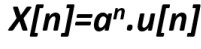

<ipython-input-1-418965921448>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, X_n, basefmt=" ", use_line_collection=True)


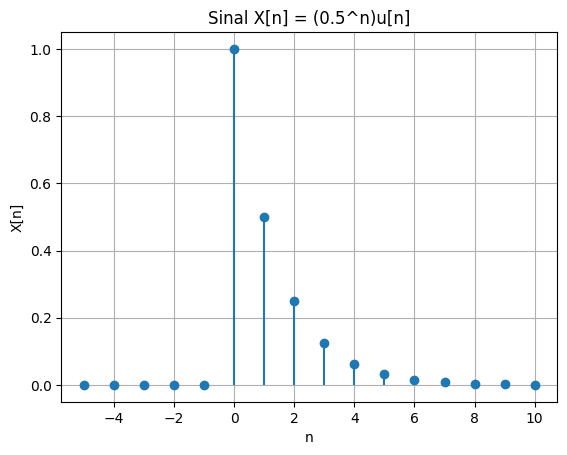

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.5

n = np.arange(-5, 11)

# calculando X[n]
X_n = np.where(n >= 0, a**n, 0)


plt.stem(n, X_n, basefmt=" ", use_line_collection=True)
plt.xlabel('n')
plt.ylabel('X[n]')
plt.title(f'Sinal X[n] = ({a}^n)u[n]')
plt.grid()
plt.show()

In [6]:
import sympy as sp

n, z = sp.symbols('n z')

x_n = (a**n) * sp.Heaviside(n) #Heaviside é a função degrau unitáario u(t)

# transformada Z
X_z = sp.summation(x_n * z**(-n), (n, -sp.oo, sp.oo))

X_z

Sum(0.5**n*Heaviside(n)/z**n, (n, -oo, oo))

<ipython-input-13-2f4eb3bcafeb>:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  roc = Circle((0, 0), abs(a), color='white', edgecolor='b', linestyle='dashed', linewidth=2)


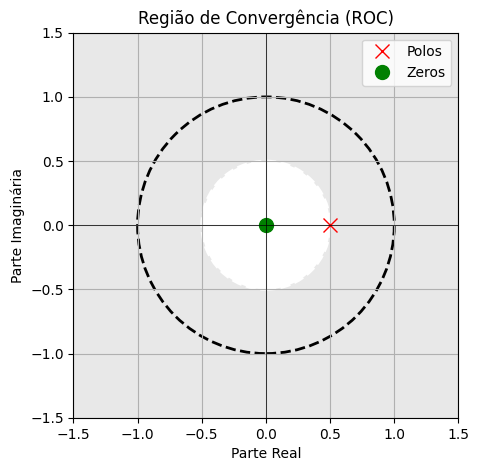

In [13]:
from matplotlib.patches import Circle
from matplotlib.patches import Polygon


a = 0.5

fig, ax = plt.subplots(figsize=(5, 5))

# limites do gráfico
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# polígono para preencher a região fora do anel
poligono = Polygon([
    (-1.5, -1.5),
    (-1.5, 1.5),
    (1.5, 1.5),
    (1.5, -1.5)], closed=True, edgecolor='none', facecolor='lightgray', alpha=0.5)
ax.add_patch(poligono)

# ROC
roc = Circle((0, 0), abs(a), color='white', edgecolor='b', linestyle='dashed', linewidth=2)
ax.add_patch(roc)


polos = np.array([a])
zeros = np.array([0])

ax.plot(np.real(polos), np.imag(polos), 'rx', markersize=10, label='Polos')
ax.plot(np.real(zeros), np.imag(zeros), 'go', markersize=10, label='Zeros')

# círculo unitário
circulo = Circle((0, 0), 1, fill=False, linestyle='dashed', color='black', linewidth=2)
plt.gca().add_patch(circulo)


ax.axvline(0, color='k', linewidth=0.5)
ax.axhline(0, color='k', linewidth=0.5)
ax.set_aspect('equal')
ax.set_xlabel('Parte Real')
ax.set_ylabel('Parte Imaginária')
ax.set_title('Região de Convergência (ROC)')
ax.grid(True)
ax.legend()

plt.show()



---



**Exemplo 2:**

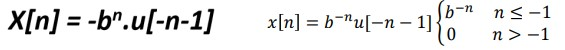

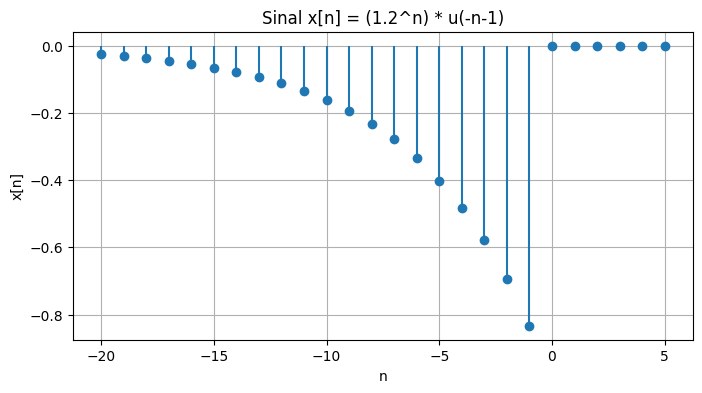

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# função x[n]
def x(n, b):
    return np.where(n <= -1, -b**n, 0)

n = np.arange(-20, 6)

b = 1.2

# x[n]
x_n = x(n, b)

plt.figure(figsize=(8, 4))
plt.stem(n, x_n, basefmt=" ")
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title(f'Sinal x[n] = ({b}^n) * u(-n-1)')
plt.grid()
plt.show()

In [16]:
import sympy as sp

n, z = sp.symbols('n z')

x_n = (-b**n) * sp.Heaviside(-n - 1)

X_z = sp.summation(x_n * z**(-n), (n, -sp.oo, sp.oo))

X_z

Sum(-1.2**n*Heaviside(-n - 1)/z**n, (n, -oo, oo))

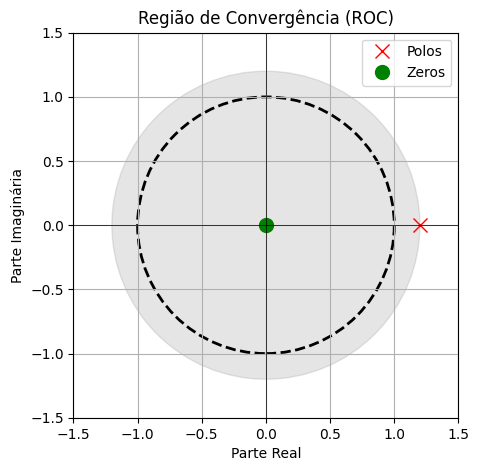

In [18]:
from matplotlib.patches import Circle

b = 1.2

fig, ax = plt.subplots(figsize=(5, 5))

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# ROC
roc = Circle((0, 0), abs(b), color='gray', alpha=0.2)
ax.add_patch(roc)


polos = np.array([b])
zeros = np.array([0])

ax.plot(np.real(polos), np.imag(polos), 'rx', markersize=10, label='Polos')
ax.plot(np.real(zeros), np.imag(zeros), 'go', markersize=10, label='Zeros')

# círculo unitário
circulo = Circle((0, 0), 1, fill=False, linestyle='dashed', color='black', linewidth=2)
plt.gca().add_patch(circulo)


ax.axvline(0, color='k', linewidth=0.5)
ax.axhline(0, color='k', linewidth=0.5)
ax.set_aspect('equal')
ax.set_xlabel('Parte Real')
ax.set_ylabel('Parte Imaginária')
ax.set_title('Região de Convergência (ROC)')
ax.grid(True)
ax.legend()

plt.show()